# Data Kuantitatif dan Data Kualitatif untuk Data pengeluaran mahasiswa undergraduate di universitas yang berada di USA

## Load data dan Data Understanding

In [52]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [53]:
df = pd.read_csv('/home/radit/MachineLearning/Statistika-Polinema/Tugas-1/data/data.csv')

print('='* 80)
print(df.info())
print('='* 80)
print(df.describe())
print('='* 80)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     3548 non-null   int64 
 1   State    3548 non-null   object
 2   Type     3548 non-null   object
 3   Length   3548 non-null   object
 4   Expense  3548 non-null   object
 5   Value    3548 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.4+ KB
None
              Year         Value
count  3548.000000   3548.000000
mean   2016.923337  13027.720124
std       2.553910   8734.568645
min    2013.000000   1225.000000
25%    2015.000000   7756.750000
50%    2017.000000  10203.500000
75%    2019.000000  14830.750000
max    2021.000000  49152.000000


## Penyajian Data Kualitatif

### One Way Data

In [54]:
print("\nDistribusi Type Universitas")
print("-" * 40)

type_freq = (
    df['Type']
    .value_counts()
    .reset_index()
)

type_freq.columns = ['Type', 'Frekuensi']
type_freq['Persentase (%)'] = (
    type_freq['Frekuensi'] / len(df) * 100
).round(2)

type_freq



Distribusi Type Universitas
----------------------------------------


,Type,Frekuensi,Persentase (%)
0,Public Out-of-State,1347,37.97
1,Public In-State,1296,36.53
2,Private,905,25.51


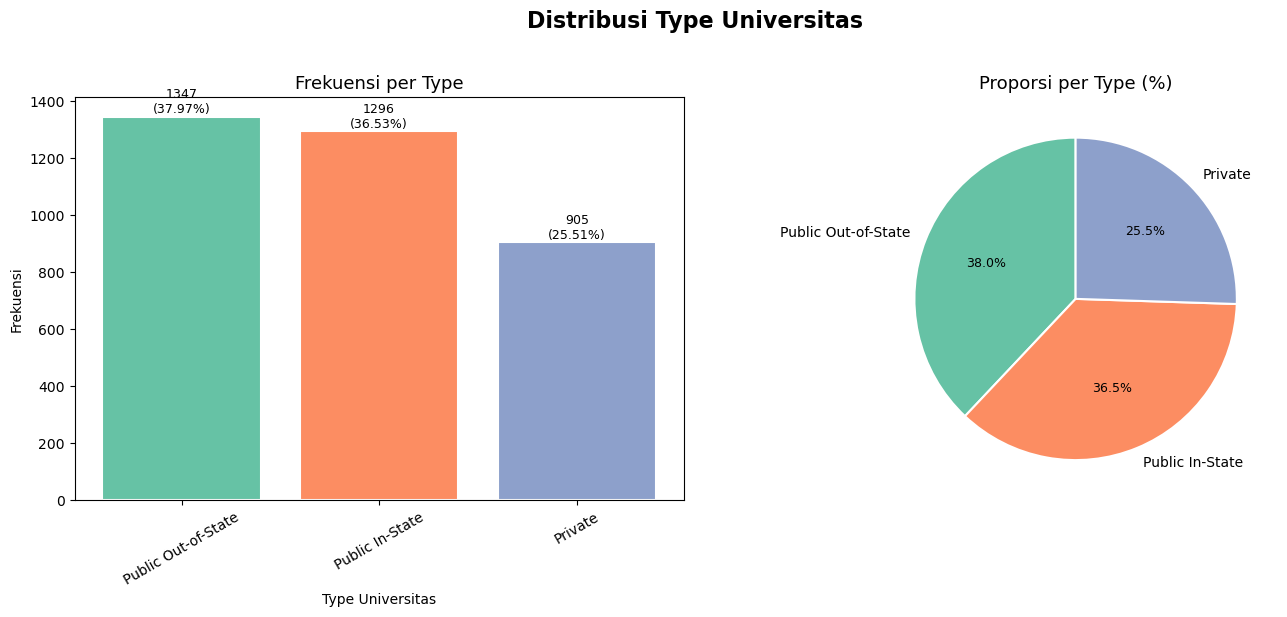

In [55]:
# Hitung frekuensi
type_freq = df['Type'].value_counts().reset_index()
type_freq.columns = ['Type', 'Frekuensi']
type_freq['Persentase (%)'] = (type_freq['Frekuensi'] / len(df) * 100).round(2)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribusi Type Universitas', fontsize=16, fontweight='bold', y=1.02)

# --- Bar Chart ---
bars = axes[0].bar(
    type_freq['Type'],
    type_freq['Frekuensi'],
    color=plt.cm.Set2.colors[:len(type_freq)],
    edgecolor='white',
    linewidth=1.5
)
axes[0].set_title('Frekuensi per Type', fontsize=13)
axes[0].set_xlabel('Type Universitas')
axes[0].set_ylabel('Frekuensi')
axes[0].tick_params(axis='x', rotation=30)

# Tambahkan label di atas bar
for bar, (_, row) in zip(bars, type_freq.iterrows()):
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f"{row['Frekuensi']}\n({row['Persentase (%)']}%)",
        ha='center', va='bottom', fontsize=9
    )

# --- Pie Chart ---
wedges, texts, autotexts = axes[1].pie(
    type_freq['Frekuensi'],
    labels=type_freq['Type'],
    autopct='%1.1f%%',
    colors=plt.cm.Set2.colors[:len(type_freq)],
    startangle=90,
    wedgeprops=dict(edgecolor='white', linewidth=1.5)
)
for text in autotexts:
    text.set_fontsize(9)
axes[1].set_title('Proporsi per Type (%)', fontsize=13)

plt.tight_layout()
plt.show()

In [56]:
print("\nDistribusi Lama Berkuliah")
print("-" * 40)

length_freq = (
    df['Length']
    .value_counts()
    .reset_index()
)

length_freq.columns = ['Length', 'Frekuensi']
length_freq['Persentase (%)'] = (
    length_freq['Frekuensi'] / len(df) * 100
).round(2)

length_freq


Distribusi Lama Berkuliah
----------------------------------------


,Length,Frekuensi,Persentase (%)
0,4-year,2672,75.31
1,2-year,876,24.69


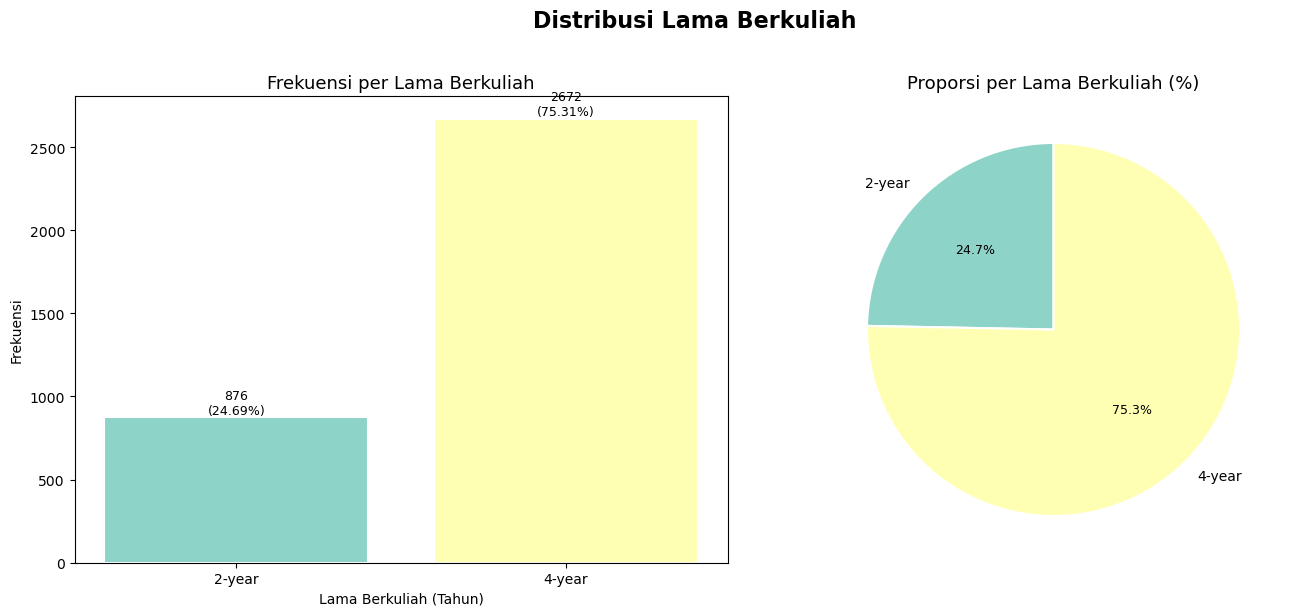

In [57]:
# Hitung frekuensi
length_freq = df['Length'].value_counts().reset_index()
length_freq.columns = ['Length', 'Frekuensi']
length_freq['Persentase (%)'] = (length_freq['Frekuensi'] / len(df) * 100).round(2)
length_freq = length_freq.sort_values('Length')  # Urutkan berdasarkan lama berkuliah

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribusi Lama Berkuliah', fontsize=16, fontweight='bold', y=1.02)

# --- Bar Chart ---
bars = axes[0].bar(
    length_freq['Length'].astype(str),
    length_freq['Frekuensi'],
    color=plt.cm.Set3.colors[:len(length_freq)],
    edgecolor='white',
    linewidth=1.5
)
axes[0].set_title('Frekuensi per Lama Berkuliah', fontsize=13)
axes[0].set_xlabel('Lama Berkuliah (Tahun)')
axes[0].set_ylabel('Frekuensi')
axes[0].tick_params(axis='x', rotation=0)

# Tambahkan label di atas bar
for bar, (_, row) in zip(bars, length_freq.iterrows()):
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.3,
        f"{row['Frekuensi']}\n({row['Persentase (%)']}%)",
        ha='center', va='bottom', fontsize=9
    )

# --- Pie Chart ---
wedges, texts, autotexts = axes[1].pie(
    length_freq['Frekuensi'],
    labels=length_freq['Length'].astype(str),
    autopct='%1.1f%%',
    colors=plt.cm.Set3.colors[:len(length_freq)],
    startangle=90,
    wedgeprops=dict(edgecolor='white', linewidth=1.5)
)
for text in autotexts:
    text.set_fontsize(9)
axes[1].set_title('Proporsi per Lama Berkuliah (%)', fontsize=13)

plt.tight_layout()
plt.show()

## Data Kuantitatif

### One Way Data

In [58]:
print("\nDistribusi Year")
year_freq = df['Year'].value_counts().reset_index()
year_freq.columns = ['Year', 'Frekuensi']
year_freq['Persentase (%)'] = (
    year_freq['Frekuensi'] / len(df) * 100
).round(2)

year_freq



Distribusi Year


,Year,Frekuensi,Persentase (%)
0,2013,403,11.36
1,2014,403,11.36
2,2015,403,11.36
3,2016,403,11.36
4,2017,401,11.30
5,2018,398,11.22
6,2019,396,11.16
7,2020,396,11.16
8,2021,345,9.72


In [59]:
fig_bar = go.Figure()

fig_bar.add_trace(go.Bar(
    x=year_freq['Year'].astype(str),
    y=year_freq['Frekuensi'],
    text=[f"{f}<br>({p}%)" for f, p in zip(year_freq['Frekuensi'], year_freq['Persentase (%)'])],
    textposition='outside',
    marker=dict(
        color=year_freq['Frekuensi'],
        colorscale='Teal',
        showscale=True,
        colorbar=dict(title='Frekuensi')
    ),
    hovertemplate=(
        "<b>Tahun:</b> %{x}<br>"
        "<b>Frekuensi:</b> %{y}<br>"
        "<b>Persentase:</b> %{text}<extra></extra>"
    )
))

fig_bar.update_layout(
    title=dict(text='Distribusi Year — Bar Chart', font=dict(size=18), x=0.5),
    xaxis=dict(title='Tahun', tickangle=-30, type='category'),
    yaxis=dict(title='Frekuensi'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    margin=dict(t=80, b=80),
    bargap=0.3
)

fig_bar.update_xaxes(showgrid=False)
fig_bar.update_yaxes(showgrid=True, gridcolor='lightgrey')

fig_bar.show()

In [60]:
mean_val   = df['Value'].mean()
median_val = df['Value'].median()

fig_hist = go.Figure()

fig_hist.add_trace(go.Histogram(
    x=df['Value'].dropna(),
    nbinsx=20,
    name='Frekuensi',
    marker=dict(
        color='steelblue',
        line=dict(color='white', width=1.2)
    ),
    opacity=0.85,
    hovertemplate="<b>Range:</b> %{x}<br><b>Frekuensi:</b> %{y}<extra></extra>"
))

# Garis Mean
fig_hist.add_vline(
    x=mean_val,
    line=dict(color='red', dash='dash', width=2),
    annotation_text=f'Mean: {mean_val:,.0f}',
    annotation_position='top right',
    annotation_font=dict(color='red', size=11)
)

# Garis Median
fig_hist.add_vline(
    x=median_val,
    line=dict(color='orange', dash='dash', width=2),
    annotation_text=f'Median: {median_val:,.0f}',
    annotation_position='top left',
    annotation_font=dict(color='orange', size=11)
)

# Statistik deskriptif di pojok kanan
stats_text = (
    f"Min    : {df['Value'].min():,.0f}<br>"
    f"Q1     : {df['Value'].quantile(0.25):,.0f}<br>"
    f"Median : {median_val:,.0f}<br>"
    f"Q3     : {df['Value'].quantile(0.75):,.0f}<br>"
    f"Max    : {df['Value'].max():,.0f}"
)

fig_hist.add_annotation(
    x=0.98, y=0.95,
    xref='paper', yref='paper',
    text=stats_text,
    showarrow=False,
    align='left',
    bgcolor='lightyellow',
    bordercolor='grey',
    borderwidth=1,
    font=dict(size=10)
)

fig_hist.update_layout(
    title=dict(text='Distribusi Pengeluaran', font=dict(size=18), x=0.5),
    xaxis=dict(title='Nilai Pengeluaran'),
    yaxis=dict(title='Frekuensi'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    margin=dict(t=80, b=60),
    bargap=0.05
)

fig_hist.update_xaxes(showgrid=False)
fig_hist.update_yaxes(showgrid=True, gridcolor='lightgrey')

fig_hist.show()

### Two Way Data

In [61]:
state_mapping = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
}

state_avg = (
    df.groupby('State')['Value']
      .mean()
      .round(2)
      .reset_index()
)

state_avg.columns = ['State', 'Avg_Value']
state_avg['State_Code'] = state_avg['State'].map(state_mapping)

state_avg = state_avg.sort_values('Avg_Value', ascending=False)

In [62]:
import plotly.graph_objects as go

# HORIZONTAL BAR CHART — Avg Cost per State
fig_bar = go.Figure()

fig_bar.add_trace(go.Bar(
    x=state_avg['Avg_Value'],
    y=state_avg['State'],
    orientation='h',
    text=[f"${v:,.0f}" for v in state_avg['Avg_Value']],
    textposition='outside',
    marker=dict(
        color=state_avg['Avg_Value'],
        colorscale='YlOrRd',
        showscale=True,
        colorbar=dict(
            title='Avg Cost ($)',
            tickprefix='$',
            tickformat=',.0f',
            thickness=15,
            len=0.75
        )
    ),
    hovertemplate=(
        "<b>%{y}</b><br>"
        "Avg Cost: $%{x:,.0f}<extra></extra>"
    )
))

# Garis overall mean
overall_mean = state_avg['Avg_Value'].mean()
fig_bar.add_vline(
    x=overall_mean,
    line=dict(color='steelblue', dash='dash', width=2),
    annotation_text=f'National Avg: ${overall_mean:,.0f}',
    annotation_position='top right',
    annotation_font=dict(color='steelblue', size=11)
)

fig_bar.update_layout(
    title=dict(
        text='Average Cost of Undergraduate Student by State (USA)',
        font=dict(size=17),
        x=0.5
    ),
    xaxis=dict(
        title='Average Cost ($)',
        tickprefix='$',
        tickformat=',.0f',
        showgrid=True,
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        title='State',
        autorange='reversed',       # State tertinggi di atas
        tickfont=dict(size=11)
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    margin=dict(t=80, b=60, l=160, r=120),
    height=1200
)

fig_bar.show()

In [63]:
# ============================================================
# CHOROPLETH MAP
# ============================================================
fig_map = px.choropleth(
    state_avg,
    locations='State_Code',
    locationmode='USA-states',
    color='Avg_Value',
    scope='usa',
    color_continuous_scale='YlOrRd',
    hover_name='State',
    hover_data={'State_Code': False, 'Avg_Value': ':,.0f'}
)

fig_map.update_traces(
    hovertemplate="<b>%{hovertext}</b><br>Avg Cost: $%{z:,.0f}<extra></extra>"
)

fig_map.update_layout(
    title=dict(
        text='Average Cost of Undergraduate Student by State (USA)',
        font=dict(size=18),
        x=0.5
    ),
    coloraxis_colorbar=dict(
        title='Avg Cost ($)',
        tickprefix='$',
        tickformat=',.0f',
        thickness=15,
        len=0.75
    ),
    geo=dict(
        showlakes=True,
        lakecolor='lightblue',
        showland=True,
        landcolor='lightgrey',
        showcoastlines=True,
        coastlinecolor='white',
        projection_type='albers usa'
    ),
    margin=dict(t=80, b=40, l=40, r=40),
    paper_bgcolor='white',
    height=550
)

fig_map.show()

## Kesimpulan 
### Penyajian yang paling cocok untuk Data Kualitatif.
Bar Chart adalah visualisasi yang paling cocok untuk data tersebut karena hanya memiliki sedikit kategori, sehingga memudahkan pada saat dibaca dan membandingkan frekuensi antar kategori.
### Penyajian yang paling cocok untuk Data Kuantitatif.
Histogram Paling cocok untuk melihat distribusi nilai pengeluaran.